In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

C:\Users\Rasyid\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
rcParams['figure.figsize'] = (15,7)
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv('hotel_booking.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
73096,City Hotel,1,274,2017,August,33,14,1,3,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,107.10,0,1,Canceled,2017-02-15,Stephanie Herrera,Stephanie_Herrera@mail.com,616-939-3033,************7184
107486,City Hotel,0,66,2017,March,10,10,1,2,2,0.0,0,BB,FRA,Groups,TA/TO,0,0,0,A,A,0,No Deposit,154.0,NaN,0,Transient-Party,80.00,0,1,Check-Out,2017-03-13,Megan Cox,Megan.Cox@verizon.com,813-117-3234,************4731
58143,City Hotel,1,104,2016,October,41,6,2,5,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.00,0,0,Canceled,2016-07-12,Bryan Fitzpatrick,Bryan_Fitzpatrick@yahoo.com,601-411-5278,************2311
18556,Resort Hotel,0,66,2015,November,47,19,1,3,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Transient,32.40,0,3,Check-Out,2015-11-23,Amy Mays,Amy.Mays@aol.com,874-571-0931,************5398
44504,City Hotel,0,35,2015,October,41,7,0,2,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,7.0,NaN,0,Transient,65.83,0,1,Check-Out,2015-10-09,Daniel Galvan,DGalvan@gmail.com,925-720-1962,************3917
69072,City Hotel,1,249,2017,May,21,25,0,3,2,2.0,0,BB,FRA,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,219.00,0,2,Canceled,2016-10-09,Tiffany Owens,TOwens23@zoho.com,567-198-8648,************1570
98585,City Hotel,0,245,2016,September,40,28,0,4,2,0.0,0,BB,AUT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,22.0,NaN,0,Transient,80.75,0,0,Check-Out,2016-10-02,Alec Shields,AShields83@gmail.com,393-857-1595,************3214
112273,City Hotel,0,61,2017,May,20,19,1,2,1,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,144.00,0,0,Check-Out,2017-05-22,George Gill,George.Gill@att.com,555-412-9808,************1208
111014,City Hotel,0,70,2017,May,18,1,1,3,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,354.0,NaN,0,Transient,123.00,0,0,Check-Out,2017-05-05,Ronald Esparza,RonaldEsparza89@yahoo.com,437-354-6432,************7555
18357,Resort Hotel,1,82,2016,February,7,7,2,0,2,0.0,0,BB,PRT,Groups,TA/TO,1,1,0,A,A,0,No Deposit,67.0,NaN,0,Transient-Party,86.00,0,0,Canceled,2015-11-17,Andrea Thompson,Andrea.T@yahoo.com,292-166-9440,************7458


# DESCRIPTIVE STATISTIC

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

kolom 'children': lebih tepat bertipe int64 bukan float64 karena tidak ada hitungan anak yang berkoma seperti 2.5

kolom 'agent'dan 'company': kedua kolom ini berisi data ID. 
Idealnya, tipe data untuk ID adalah int64 atau object. Untuk kolom 'agent'dan 'company' lebih tepat menggunakan int64 karena dilihat dari dataset ID kedua kolom ini dalam angka

kolom reservation_status_date: harusnya bertipe datetime bukan object


In [84]:
num = ['is_canceled','lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','agent','company','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']
#Country dan reservation_status_date di drop atau label encoding krn terlalu banyak uniq value
cat = ['hotel','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status']

In [69]:
df[num].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [70]:
df[df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,Chase Santos,Chase_Santos@outlook.com,472-408-0661,************9176


In [71]:
df[cat].describe()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,8,5,10,12,3,4,3
top,City Hotel,August,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,56477,97870,85994,74053,104641,89613,75166


Kolom yang memiliki nilai kosong

kolom 'company'sebesar 94.307%. Kolom 'company' akan di drop karena nilai kosong terlalu besar.<br>
kolom 'agent' sebesar 13.686%. Kolom 'agent' akan diubah dengan value O: tidak punya ID dan 1: punya ID.<br>
kolom 'country' sebesar 0.409%. Nilai kosong akan diisi dengan mode (country yang paling sering muncul).<br>
kolom 'children' sebesar 0.003%. Nilai kosong akan di drop.<br>

Baris yang duplikat
Tidak terdapat baris duplikat

Handling missing value akan dilakukan pada tahap Data Pre-Processing

Pada kolom lead_time terdapat nilai max yang cukup aneh yaitu sebesar 737 yang artinya jarak antara hari dilakukan reservasi dengan hari-H nya berjarak 737 hari (2 tahun lebih).<br>
Nilai max pada kolom days_in_waiting_list adalah 391 yang berarti lamanya konsumen berada pada waiting list untuk mengonfirmasi reservasi yang dilakukan oleh konsumen yaitu 391 hari.<br>
Pada kolom ADR terdapat nilai minus ADR (Average Daily Rate) dihitung dari pendapatan rata-rata yang diperoleh dari kamar dan membaginya.<br> dengan jumlah kamar yang terjual. Sehingga tidak normal ADR bernilai minus.<br>
Pada kolom adult terdapat nilai 0 (nol) sehingga perlu dilihat lagi mengingat sepertinya tidak mungkin membuat pesanan tanpa adult.<br>
Kolom country, name, email, phone_number, credit_card memiliki unique value yang terlalu banyak dan merupakan data fiktif.<br>

# UNIVARIATE ANALYSIS

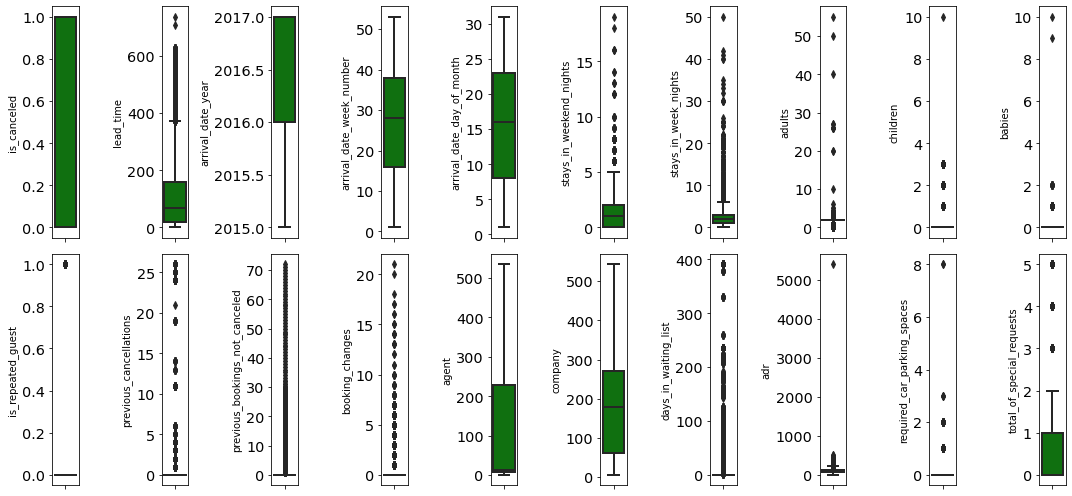

In [72]:
features = num
for i in range(0, len (features)):
    plt.subplot(2,10,i+1)
    sns.boxplot(y = df[features[i]], color = 'green', orient = 'v')
    plt.tight_layout()

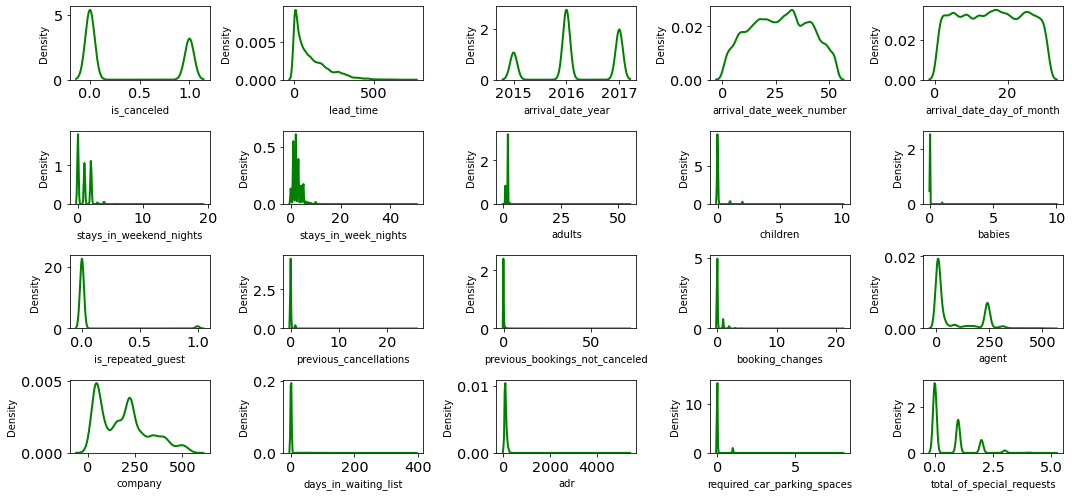

In [73]:
features = num
for i in range(0, len (features)):
    plt.subplot(4,5,i+1)
    sns.kdeplot(x = df[features[i]], color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

In [86]:
df.skew()

C:\Users\Rasyid\AppData\Local\Temp/ipykernel_2984/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


is_canceled                        0.536678
lead_time                          1.346550
arrival_date_year                 -0.232583
arrival_date_week_number          -0.010014
arrival_date_day_of_month         -0.002000
stays_in_weekend_nights            1.380046
stays_in_week_nights               2.862249
adults                            18.317805
children                           4.112590
babies                            24.646545
is_repeated_guest                  5.326315
previous_cancellations            24.458049
previous_bookings_not_canceled    23.539800
booking_changes                    6.000270
agent                              1.089386
company                            0.601600
days_in_waiting_list              11.944353
adr                               10.530214
required_car_parking_spaces        4.163233
total_of_special_requests          1.349189
dtype: float64

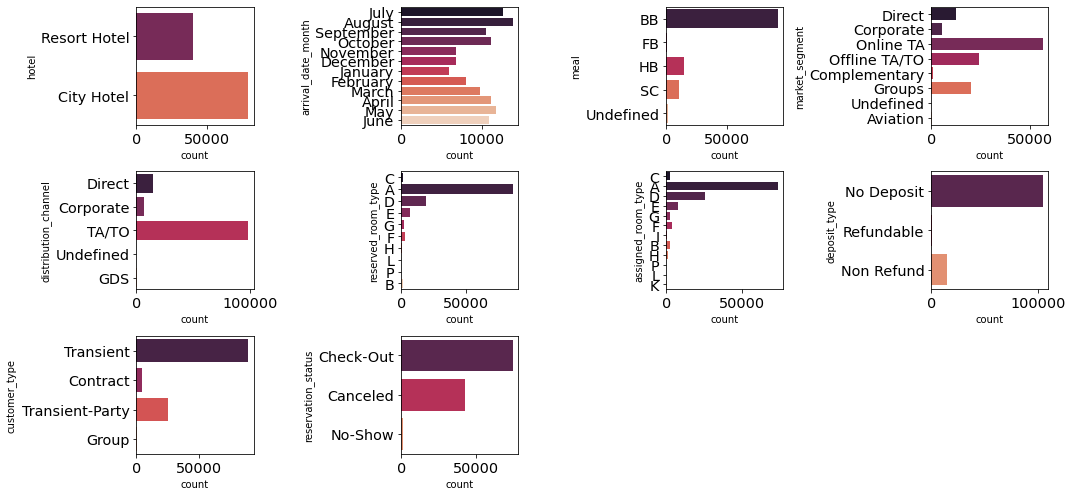

In [74]:
features = cat
for i in range(0, len (features)):
    plt.subplot(3,4,i+1)
    sns.countplot(y = df[features[i]], palette = 'rocket')
    plt.tight_layout()

# MULTIVARIATE ANALYSIS

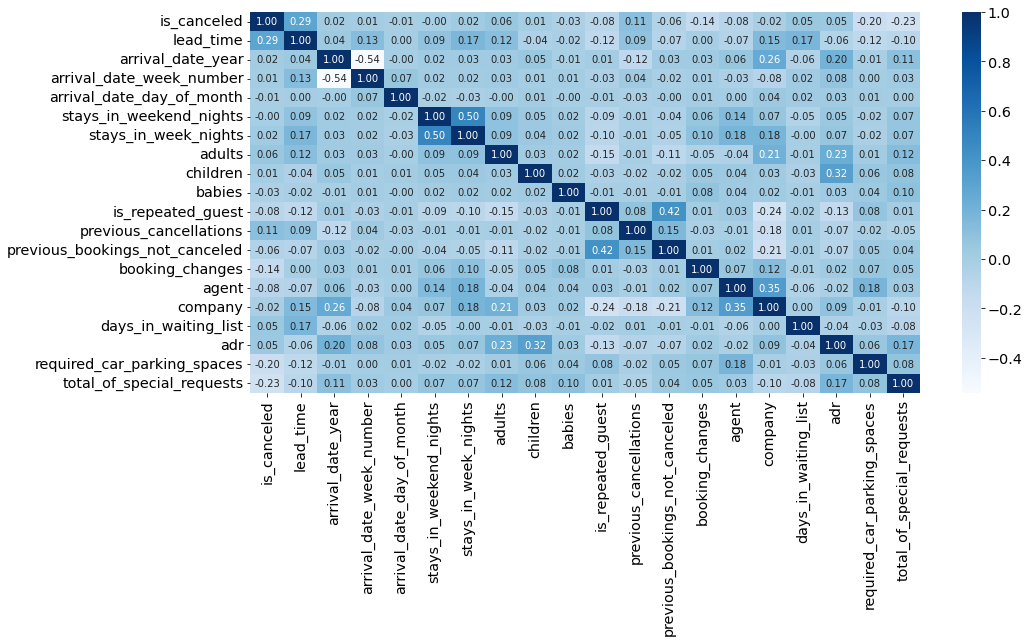

In [14]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f');

### fitur potensial lead_time, previous_cancellation, required_car_parking_spaces, total_of_special_requests, booking_changes
### fitur redundan 

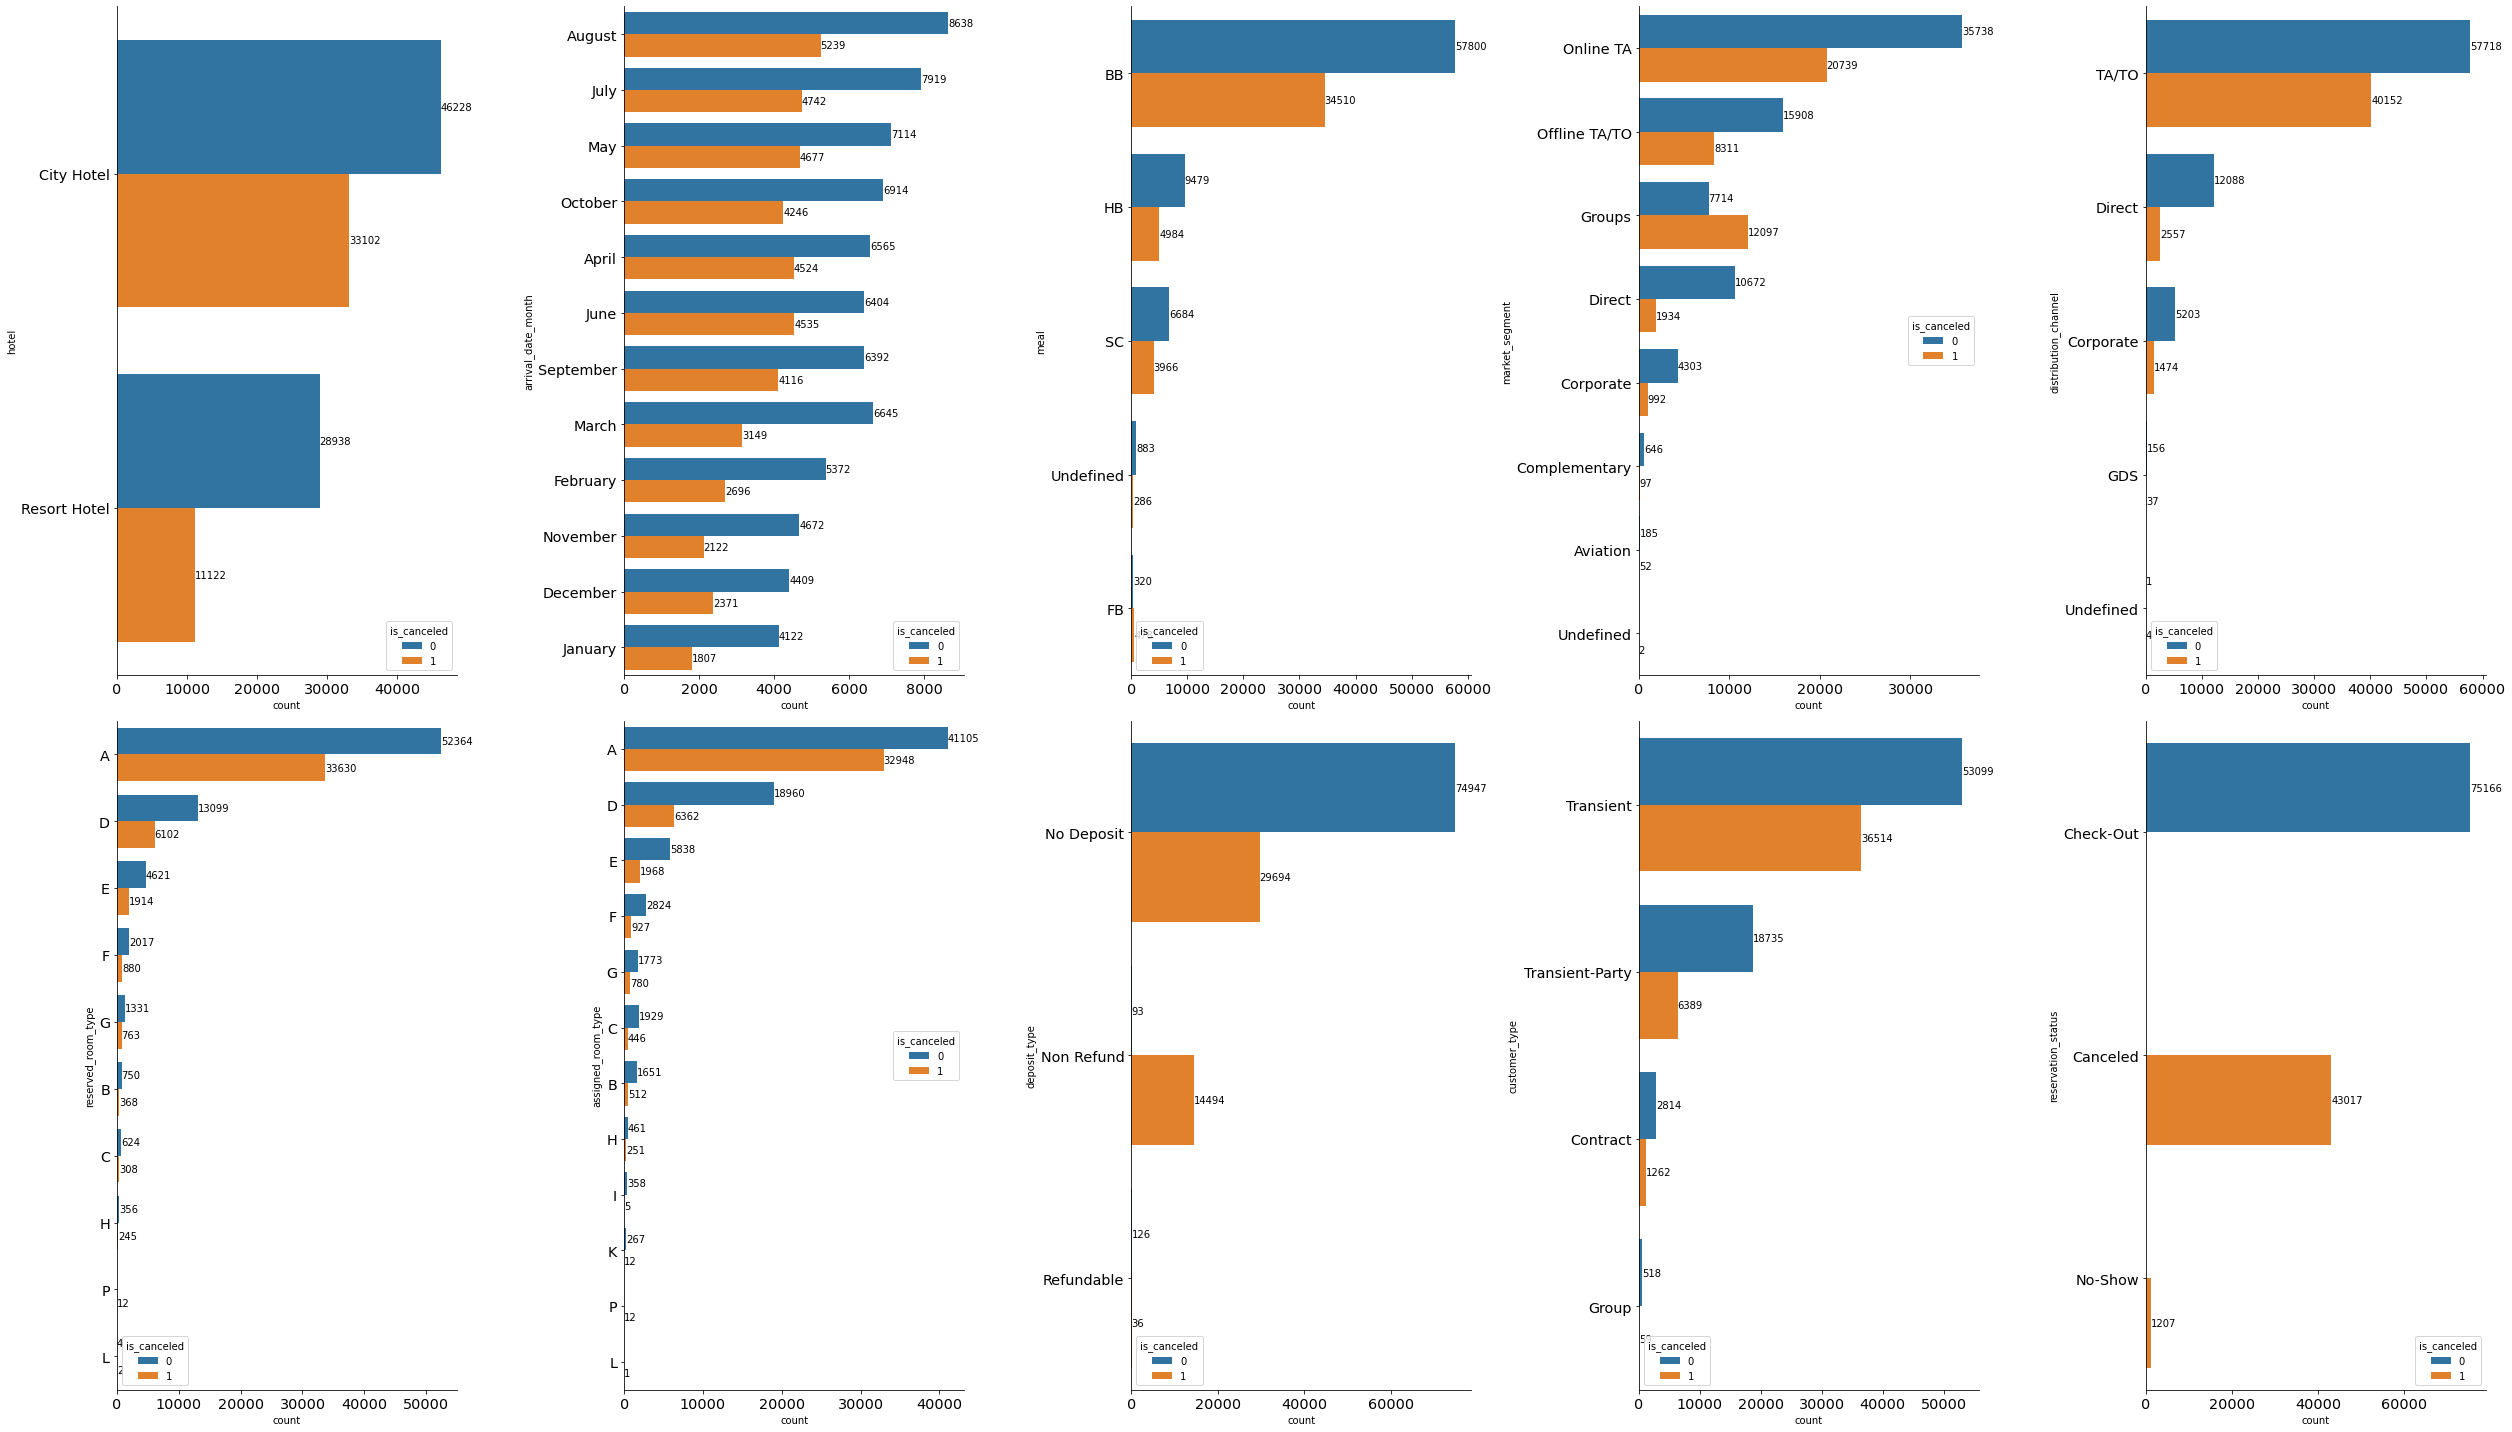

In [77]:
plt.figure(figsize = (35,20))
for i in range(len(cat)):
    plt.subplot(2, 5, i+1)
    ax = sns.countplot(y = cat[i], hue = 'is_canceled', data = df, order=df[cat[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    sns.despine()
plt.tight_layout()

In [79]:
df_bi = pd.read_csv('hotel_booking.csv')

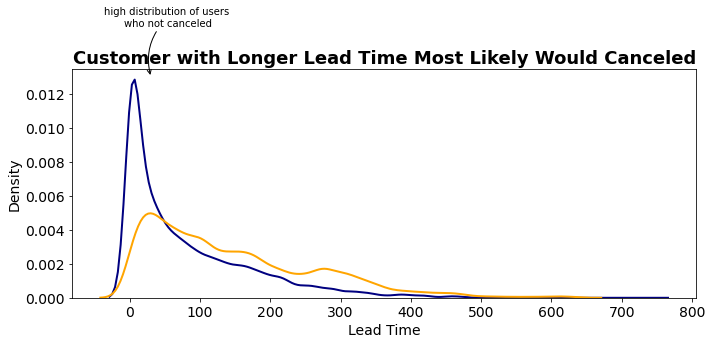

In [80]:
# mencari hubungan antara lead_time dengan is_cancelled

fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df_bi[df_bi['is_canceled'] == 0]['lead_time'].dropna(), color= 'navy', label= 'Canceled: No', ax=ax)
sns.kdeplot(df_bi[df_bi['is_canceled'] == 1]['lead_time'].dropna(), color= 'orange', label= 'Canceled: Yes', ax=ax)

ax.set_title('Customer with Longer Lead Time Most Likely Would Canceled',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Lead Time', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

ax.annotate('high distribution of users \nwho not canceled', 
            xy=(30, 0.013), xytext=(55, 0.016), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center')

plt.tight_layout()

Customer yang memiliki lead time yang lebih lama memiliki tingkat canceled yang lebih tinggi.

Rekomendasi bisnis untuk mengatasi masalah tersebut adalah dengan membuat regulasi minimal open reserved seperti 3 bulan - 6 bulan sebelum hari - H. Hal ini juga akan memudahkan pihak hotel untuk menerapkan pricing room secara dinamis tergantung event/season yang akan terjadi pada tanggal yang di booking oleh konsumen.

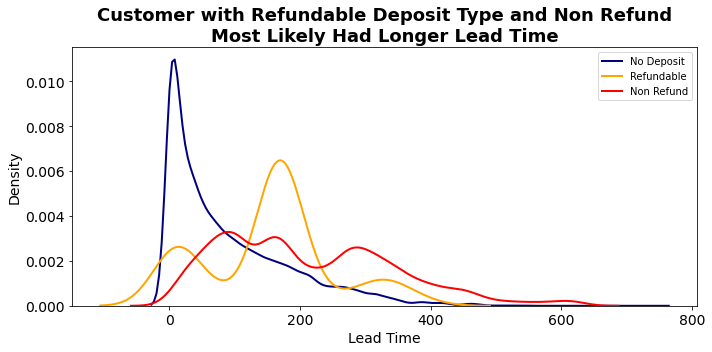

In [81]:
#melihat persebaran lead time berdasarkan deposit type
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df_bi[df_bi['deposit_type'] == 'No Deposit']['lead_time'].dropna(), color= 'navy', label= 'No Deposit', ax=ax)
sns.kdeplot(df_bi[df_bi['deposit_type'] == 'Refundable']['lead_time'].dropna(), color= 'orange', label= 'Refundable', ax=ax)
sns.kdeplot(df_bi[df_bi['deposit_type'] == 'Non Refund']['lead_time'].dropna(), color= 'red', label= 'Non Refund', ax=ax)
ax.set_title('Customer with Refundable Deposit Type and Non Refund\nMost Likely Had Longer Lead Time',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Lead Time', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend()

ax.annotate('high distribution of users \nwho not canceled', 
            xy=(30, 0.013), xytext=(55, 0.016), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center')

plt.tight_layout()

Pemesanan hotel dengan jenis deposit non refund memiliki cancellation rate terbesar yaitu mencapai 99% dibandingkan dengan jenis deposit lainnya.

Salah satu alasannya adalah karena pemesanan hotel dengan jenis deposit non refund memiliki median lead time tertinggi.

Sejalan dengan rekomendasi bisnis pertama untuk mengatasi masalah ini adalah dengan membuat regulasi minimal open reserved seperti 3 bulan - 6 bulan sebelum hari - H, lebih dari itu open reserved tidak diterima. Jenis deposit non refund akan diterapkan pada pemesanan dengan lead time lebih dari 6 bulan.

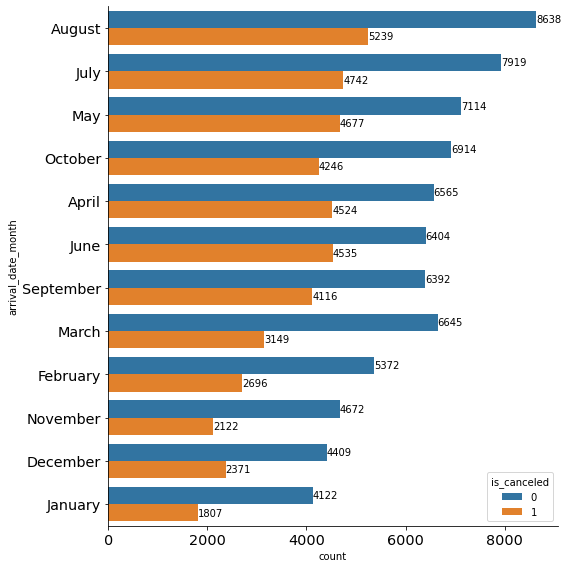

In [82]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(y = 'arrival_date_month', hue='is_canceled', data=df, order=df['arrival_date_month'].value_counts().index)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
sns.despine()
plt.tight_layout()
plt.show()

Pemesanan Hotel

Apabila dilihat dari waktu kedatangan customer setiap bulannya, terlihat bahwa mereka paling banyak datang di musim panas (May, July, Agustus). Kemudian di bulan Agustus terbanyak dikarenakan pada bulan tersebut merupakan puncak musim panas. Rekomendasi bisnis untuk insight ini adalah melalukan summer sale untuk menjangkau lebih banyak konsumen serta membuat tingkat cancel lebih rendah.